In [ ]:
# TITANIC : WHO WILL SURVIVE 

In [ ]:
<img src="kuku.jpg" alt="what they will do for love" title="man vs women" />

## import important library : we will import other libraries when we need them
better way is to speculate what you will need and import exactly that thing for saving memory usage.

In [1]:
import os

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\ernag\\Desktop\\ML Projects'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'gender_submission.csv',
 'hel.png',
 'kuku.jpg',
 'submission',
 'test.csv',
 'TITANIC predictions.ipynb',
 'TITANIC.ipynb',
 'titanic.zip',
 'train.csv']

In [4]:
import pandas as pd

## Loading data and Understanding the data
we load gender_submission to understand our testing accuracy

In [5]:
df=pd.read_csv('train.csv')
X_test =pd.read_csv('test.csv')
Y_test = pd.read_csv('gender_submission.csv')

In [6]:
PassengerId =X_test['PassengerId']

In [7]:
PassengerId.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [8]:
print('X_train')
df.info()
print('-'*70)
print('X_test')
X_test.info()

X_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------------------------------------
X_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          4

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


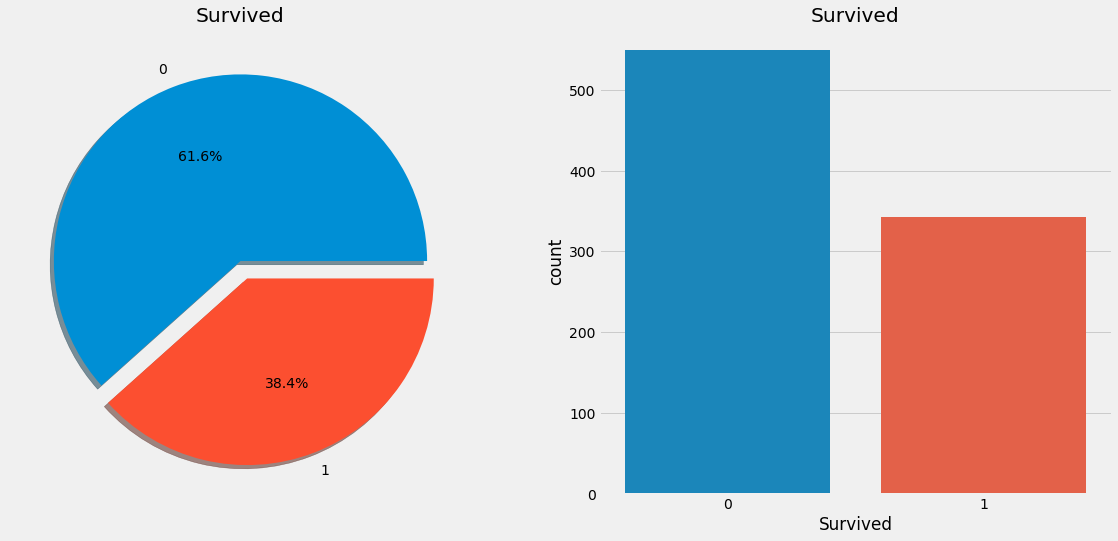

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## DATA WRANGLING

 make a new feature 'Initial' from 'Name' column 

In [17]:
df['Initial']=0
for i in df.Name:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [18]:
X_test['Initial']=0
for i in X_test.Name:
    X_test['Initial']=X_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [19]:
df['Initial'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [20]:
X_test['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [21]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
df['Pclass'].replace([1,2,3],['first','second','third'],inplace=True)
X_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)
X_test['Pclass'].replace([1,2,3],['first','second','third'],inplace=True)

In [23]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex




Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [24]:
pd.crosstab(X_test.Initial,X_test.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,79,0,73,0
male,21,0,241,0,4


In [25]:
df.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

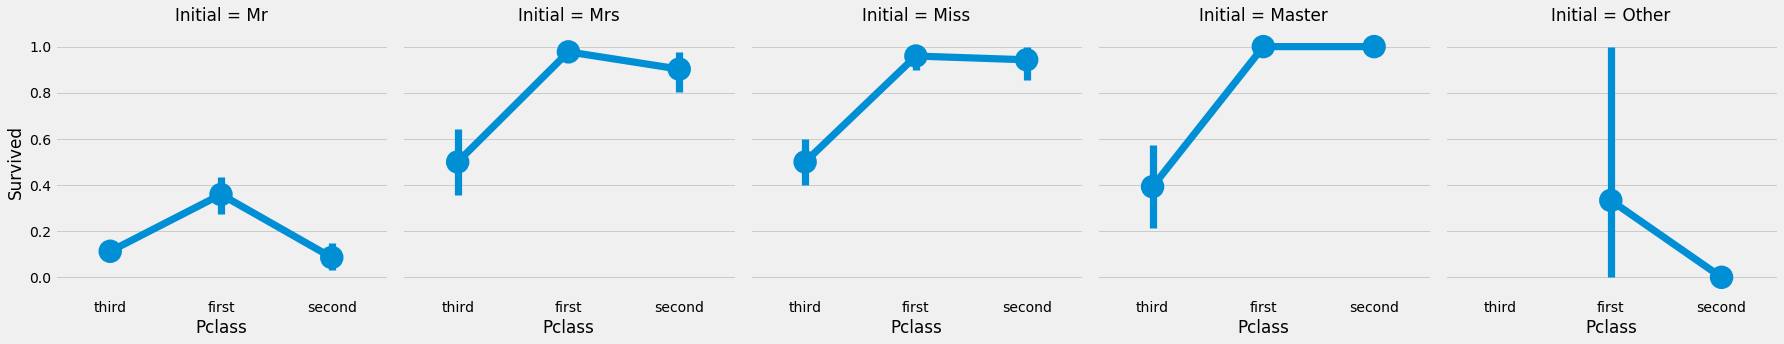

In [26]:
sns.factorplot('Pclass','Survived',col='Initial',data=df)
plt.show()

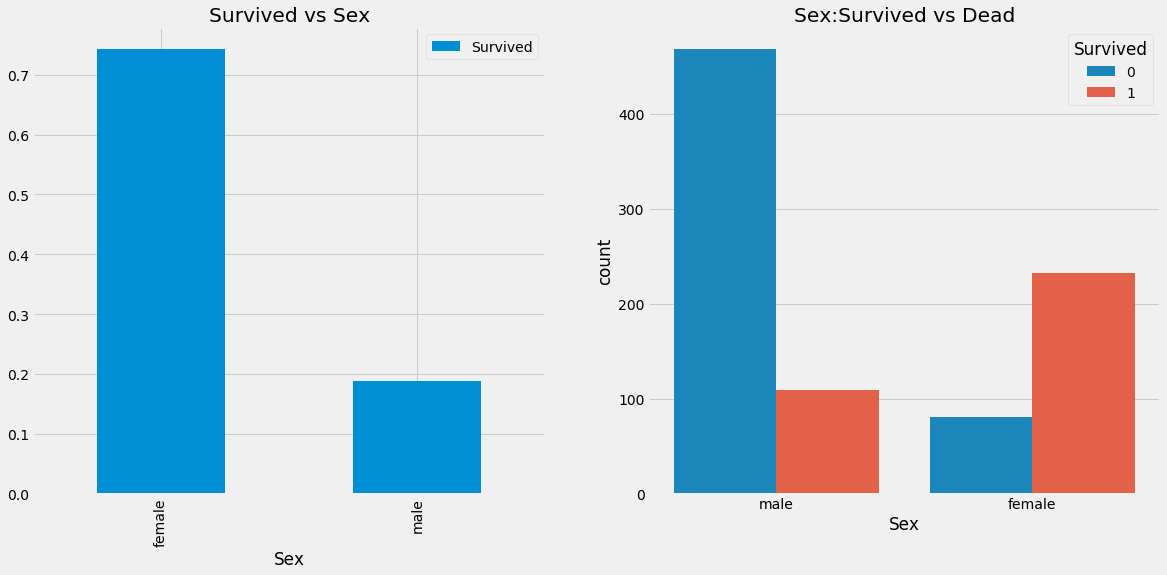

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [28]:
df.groupby('Initial')['Age'].mean()


Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [29]:
X_test.groupby('Initial')['Age'].mean()

Initial
Master     7.406471
Miss      21.774844
Mr        32.114130
Mrs       38.904762
Other     42.750000
Name: Age, dtype: float64

### Remove nan(NaN): putting values of average age respect to title of person(Initial)

In [30]:
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial=='other'),'Age']=46

In [31]:
X_test.loc[(X_test.Age.isnull())&(X_test.Initial=='Master'),'Age']=5
X_test.loc[(X_test.Age.isnull())&(X_test.Initial=='Miss'),'Age']=22
X_test.loc[(X_test.Age.isnull())&(X_test.Initial=='Mr'),'Age']=33
X_test.loc[(X_test.Age.isnull())&(X_test.Initial=='Mrs'),'Age']=36
X_test.loc[(X_test.Age.isnull())&(X_test.Initial=='other'),'Age']=46

In [32]:
df.Initial.isnull().any()


False

In [33]:
X_test.Initial.isnull().any()

False

In [34]:
print('X_train')
df.info()
print('-'*70)
print('X_test')
X_test.info()

X_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Initial        891 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 90.6+ KB
----------------------------------------------------------------------
X_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null object
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp        

In [35]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

In [36]:
df.loc[(df.Embarked.isnull())]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
61,62,1,first,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,first,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [37]:
X_test.loc[(X_test.Embarked.isnull())]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial


In [38]:
df.loc[61]

PassengerId                     62
Survived                         1
Pclass                       first
Name           Icard, Miss. Amelie
Sex                         female
Age                             38
SibSp                            0
Parch                            0
Ticket                      113572
Fare                            80
Cabin                          B28
Embarked                       NaN
Initial                       Miss
Name: 61, dtype: object

In [39]:
df["Embarked"].fillna("S",inplace=True)
X_test["Embarked"].fillna("S",inplace=True)

In [40]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial'],
      dtype='object')

In [42]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
886,887,0,second,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Other
887,888,1,first,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss
888,889,0,third,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.45,NaN,S,Miss
889,890,1,first,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr
890,891,0,third,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr


### creating new feature by appending 'Parch' and 'SibSp'

In [43]:
df['FamilySize'] = df['Parch'] + df['SibSp']
X_test['FamilySize'] = df['Parch'] + df['SibSp']

## DATA CLEANING

In [44]:
data=df.drop(['PassengerId','Name', 'Cabin','Ticket','Parch','SibSp'],axis=1,)
X_test=X_test.drop(['PassengerId','Name', 'Cabin','Ticket','Parch','SibSp'],axis=1,)

In [45]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Initial,FamilySize
0,0,third,male,22.0,7.2500,S,Mr,1
1,1,first,female,38.0,71.2833,C,Mrs,1
2,1,third,female,26.0,7.9250,S,Miss,0
3,1,first,female,35.0,53.1000,S,Mrs,1
4,0,third,male,35.0,8.0500,S,Mr,0


In [46]:
data.isnull().sum()



Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Initial       0
FamilySize    0
dtype: int64

In [47]:
X_test.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          1
Embarked      0
Initial       0
FamilySize    0
dtype: int64

In [48]:
X_test.loc[(X_test.Fare.isnull())]

,Pclass,Sex,Age,Fare,Embarked,Initial,FamilySize
152,third,male,60.5,NaN,S,Mr,0


In [49]:
X_test["Fare"].fillna(X_test.Fare.mean(),inplace=True)

In [50]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Initial,FamilySize
0,0,third,male,22.0,7.2500,S,Mr,1
1,1,first,female,38.0,71.2833,C,Mrs,1
2,1,third,female,26.0,7.9250,S,Miss,0
3,1,first,female,35.0,53.1000,S,Mrs,1
4,0,third,male,35.0,8.0500,S,Mr,0


In [51]:
data.FamilySize.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [52]:
data.FamilySize.value_counts().to_frame().style.background_gradient(cmap='summer')

,FamilySize
0,537
1,161
2,102
3,29
5,22
4,15
6,12
10,7
7,6


## ONE HOT ENCODING 

In [53]:
data= pd.get_dummies(data)
X_test=pd.get_dummies(X_test)

In [54]:
data["Age"]=((data["Age"]-data["Age"].min())/(data["Age"].max()-data["Age"].min()))
data["Fare"]=((data["Fare"]-data["Fare"].min())/(data["Fare"].max()-data["Fare"].min()))
data["FamilySize"]=((data["FamilySize"]-data["FamilySize"].min())/(data["FamilySize"].max()-data["FamilySize"].min()))

In [55]:
X_test["Age"]=((X_test["Age"]-X_test["Age"].min())/(X_test["Age"].max()-X_test["Age"].min()))
X_test["Fare"]=((X_test["Fare"]-X_test["Fare"].min())/(X_test["Fare"].max()-X_test["Fare"].min()))
X_test["FamilySize"]=((X_test["FamilySize"]-X_test["FamilySize"].min())/(X_test["FamilySize"].max()-X_test["FamilySize"].min()))

In [56]:
data.head()


,Survived,Age,Fare,FamilySize,Pclass_first,Pclass_second,Pclass_third,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,0.472229,0.139136,0.1,1,0,0,1,0,1,0,0,0,0,0,1,0
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,0,1,0,1,0,0,0
3,1,0.434531,0.103644,0.1,1,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,0,1,0,0,1,0,0


In [57]:
X_test.head()

,Age,Fare,FamilySize,Pclass_first,Pclass_second,Pclass_third,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,0.452723,0.015282,0.1,0,0,1,0,1,0,1,0,0,0,1,0,0
1,0.617566,0.013663,0.1,0,0,1,1,0,0,0,1,0,0,0,1,0
2,0.815377,0.018909,0.0,0,1,0,0,1,0,1,0,0,0,1,0,0
3,0.353818,0.016908,0.1,0,0,1,0,1,0,0,1,0,0,1,0,0
4,0.287881,0.023984,0.0,0,0,1,1,0,0,0,1,0,0,0,1,0


In [58]:
Y_train = data.pop('Survived')

In [59]:
X_train=data

In [60]:
X_test.head()

,Age,Fare,FamilySize,Pclass_first,Pclass_second,Pclass_third,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,0.452723,0.015282,0.1,0,0,1,0,1,0,1,0,0,0,1,0,0
1,0.617566,0.013663,0.1,0,0,1,1,0,0,0,1,0,0,0,1,0
2,0.815377,0.018909,0.0,0,1,0,0,1,0,1,0,0,0,1,0,0
3,0.353818,0.016908,0.1,0,0,1,0,1,0,0,1,0,0,1,0,0
4,0.287881,0.023984,0.0,0,0,1,1,0,0,0,1,0,0,0,1,0


## Predictive Modeling (Using API)

### importing all of Algoriths that we want to use
#### Linear_model: 
<font color=blue>LogisticRegression,
              Perceptron, 
              SGDClassifier, 
              LogisticRegressionCV, 
              PassiveAggressiveClassifier,
              RidgeClassifierCV, Lasso, Ridge
<font color=black>   
    
#### Neighbors:
<font color=red> KNeighborsRegressor, NearestNeighbors, KNeighborsClassifier 
<font color=black>
    
#### Naive Bayes:
<font color=green>BernoulliNB, GaussianNB
<font color=black>
    
#### SVM:
<font color=pink>LinearSVC, SVC
<font color=black>
    
#### Tree:
<font color=blue>DecisionTreeClassifier, DecisionTreeRegressor
<font color=black>
    
#### Neural network:
<font color=red>MLPClassifier, MLPRegressor 
<font color=black>
    
#### Ensemble:
<font color=black>AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

In [61]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors, KNeighborsClassifier 
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor   
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

In [62]:
X_train.info()
print('-'*70)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
Age               891 non-null float64
Fare              891 non-null float64
FamilySize        891 non-null float64
Pclass_first      891 non-null uint8
Pclass_second     891 non-null uint8
Pclass_third      891 non-null uint8
Sex_female        891 non-null uint8
Sex_male          891 non-null uint8
Embarked_C        891 non-null uint8
Embarked_Q        891 non-null uint8
Embarked_S        891 non-null uint8
Initial_Master    891 non-null uint8
Initial_Miss      891 non-null uint8
Initial_Mr        891 non-null uint8
Initial_Mrs       891 non-null uint8
Initial_Other     891 non-null uint8
dtypes: float64(3), uint8(13)
memory usage: 32.3 KB
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
Age               418 non-null float64
Fare              418 non-null

In [63]:
Y_test= Y_test.pop('Survived')

## LOOP FOR FITTING AND PREDICTING USING ALL MODEL (API) 

In [64]:
model= [LogisticRegression(), KNeighborsClassifier(), Perceptron(), SGDClassifier(), LogisticRegressionCV(), PassiveAggressiveClassifier(), RidgeClassifierCV(), Lasso(), Ridge(), KNeighborsRegressor(), KNeighborsClassifier() , BernoulliNB() ,GaussianNB() , LinearSVC(), SVC() , DecisionTreeClassifier(), DecisionTreeRegressor(), MLPClassifier() ,MLPRegressor() , AdaBoostClassifier(), BaggingClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), RandomForestClassifier()]
name = ['LogisticRegression','KNeighborsClassifier','Perceptron','SGDClassifier','LogisticRegressionCV','PassiveAggressiveClassifier','RidgeClassifierCV','Lasso','Ridge','KNeighborsRegressor','KNeighborsClassifier','BernoulliNB','GaussianNB','LinearSVC','SVC','DecisionTreeClassifier','DecisionTreeRegressor','MLPClassifier','MLPRegressor','AdaBoostClassifier','BaggingClassifier','ExtraTreesClassifier','GradientBoostingClassifier','RandomForestClassifier']
SCORE= []
TESTING=[]
for ku in model:
    #ku will be replaced with each model like as first one is LogisticRegression()
    algorithm = ku.fit(X_train,Y_train)
    print(ku)
    #now 'algorithm' will be fitted by API with above line and next line will check score with data training and testing
    print('training set accuracy: {:.2f}'.format(algorithm.score(X_train,Y_train)))
    print('test set accuracy: {:.2f}'.format(algorithm.score(X_test,Y_test)))
    print('---'*20)
    #Now we are making a dataframe where by each loop the dataframe is added by SCORE,TESTING
    SCORE.append(algorithm.score(X_train,Y_train))
    TESTING.append(algorithm.score(X_test,Y_test))
models_dataframe=pd.DataFrame({'training score':SCORE,'testing score':TESTING},index=name)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
training set accuracy: 0.83
test set accuracy: 0.93
------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
training set accuracy: 0.87
test set accuracy: 0.86
------------------------------------------------------------
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)
training set accuracy: 0.82
test set accuracy: 0.95
--------

### Checking the Accuracy of Models

In [65]:
models_dataframe

,training score,testing score
LogisticRegression,0.831650,0.928230
KNeighborsClassifier,0.867565,0.861244
Perceptron,0.821549,0.949761
SGDClassifier,0.813692,0.949761
LogisticRegressionCV,0.832772,0.909091
PassiveAggressiveClassifier,0.791246,0.791866
RidgeClassifierCV,0.833895,0.933014
Lasso,0.000000,-0.001764
Ridge,0.444193,0.627494
KNeighborsRegressor,0.586954,0.507068


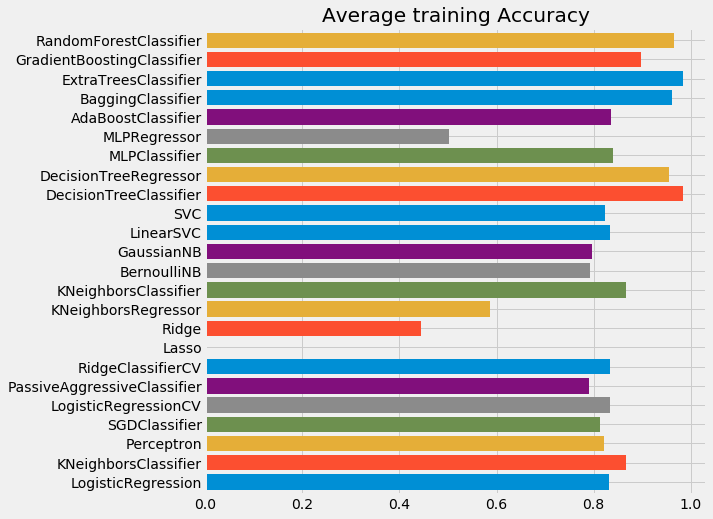

In [66]:
models_dataframe['training score'].plot.barh(width=0.8)
plt.title('Average training Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

#### MODEL COMPARISON
SEEING IN DESCENDING ORDER FOR EASIER COMPARISON

In [67]:
asendingtraining = models_dataframe.sort_values(by='training score', ascending=False)
asendingtraining 

,training score,testing score
ExtraTreesClassifier,0.983165,0.787081
DecisionTreeClassifier,0.983165,0.794258
RandomForestClassifier,0.965208,0.825359
BaggingClassifier,0.960718,0.825359
DecisionTreeRegressor,0.955920,0.139428
GradientBoostingClassifier,0.897868,0.858852
KNeighborsClassifier,0.867565,0.861244
KNeighborsClassifier,0.867565,0.861244
MLPClassifier,0.840629,0.880383
AdaBoostClassifier,0.836139,0.894737


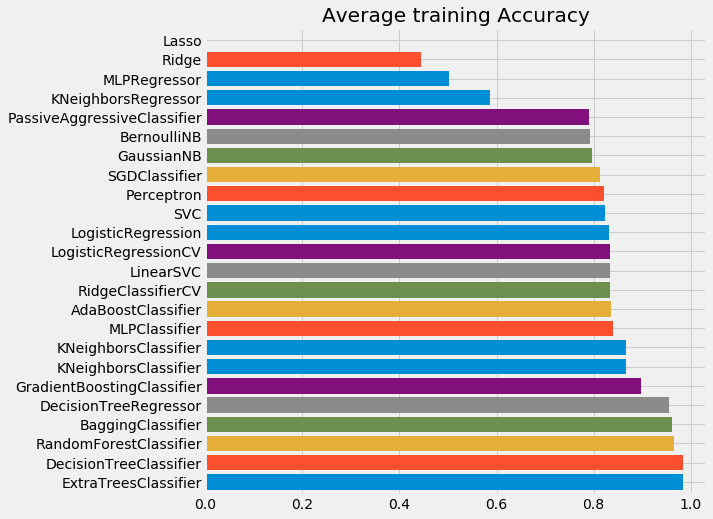

In [68]:
asendingtraining['training score'].plot.barh(width=0.8)
plt.title('Average training Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [69]:
ascendingtesting= models_dataframe.sort_values(by='testing score', ascending=True)
ascendingtesting

,training score,testing score
Lasso,0.000000,-0.001764
DecisionTreeRegressor,0.955920,0.139428
KNeighborsRegressor,0.586954,0.507068
MLPRegressor,0.502933,0.566500
Ridge,0.444193,0.627494
ExtraTreesClassifier,0.983165,0.787081
PassiveAggressiveClassifier,0.791246,0.791866
DecisionTreeClassifier,0.983165,0.794258
BaggingClassifier,0.960718,0.825359
RandomForestClassifier,0.965208,0.825359


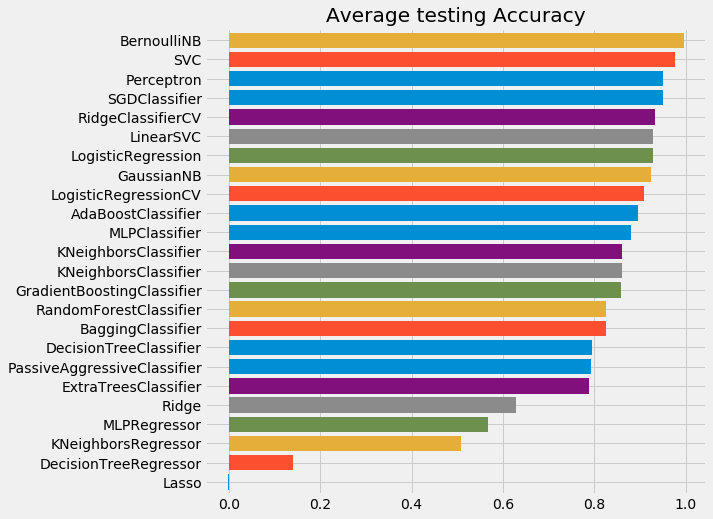

In [70]:
ascendingtesting['testing score'].plot.barh(width=0.8)
plt.title('Average testing Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

## Predicting for Submission to kaggle by comparing Score 

#### Best model in term of overfitting and underfitting

In [71]:
model = LogisticRegression()
model.fit(X_train,Y_train)
prediction=model.predict(X_test)

In [72]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": prediction
    })

In [73]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### Highest Accuracy by model

In [92]:
model=BernoulliNB().fit(X_train,Y_train)
prediction= model.predict(X_test)
gender_submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": prediction
    })

In [93]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [98]:
gender_submission.to_csv('C:\\Users\\ernag\\Desktop\\ML Projects\submission\gender_submission.csv',index=False)

In [76]:
os.listdir()

['.ipynb_checkpoints',
 'gender_submission.csv',
 'hel.png',
 'kuku.jpg',
 'submission',
 'test.csv',
 'TITANIC predictions.ipynb',
 'TITANIC.ipynb',
 'titanic.zip',
 'train.csv']

## submission file is locally saved and can be used for Submission at Kaggle